In [94]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

In [95]:
raw_report = open('amazon_cells_labelled.txt')
raw_report = pd.read_table(raw_report,delimiter = '\t', header = None)
raw_report.columns = ['message', 'sentiment']
raw_report

,message,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [96]:
keywords = ['good','great','best','junk','waste','disappoint','junk','waste','disappointed']

In [97]:
for key in keywords : 
    raw_report[str(key)] = raw_report.message.str.contains(
    ' '+ str(key) +' ',
        case = False
    )

In [98]:
raw_report['length']=raw_report['message'].apply(len)>50
raw_report['allcaps'] = raw_report.message.str.isupper()

** NOT RERUN BELOW CELL !!!!!!!!**

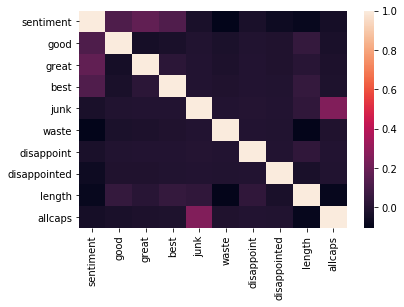

In [99]:
raw_report['sentiment'] = (raw_report['sentiment'] == 1)
sns.heatmap(raw_report.corr())

In [100]:
data = raw_report[keywords+['length']+['allcaps']]
target = raw_report['sentiment']

In [101]:
bnb = BernoulliNB()

bnb.fit(data_pos,target)

y_pred = bnb.predict(data)

print('Number of mislabeled points out of total {} points : {}'.format(
      data.shape[0],
      (target != y_pred).sum() 
))

Number of mislabeled points out of total 1000 points : 404


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.605
Testing on Sample: 0.596


In [104]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.63, 0.59, 0.6 , 0.61, 0.64, 0.54, 0.61, 0.55, 0.64, 0.55])

In [105]:
raw_report_2 = raw_report.drop(['length'],axis = 1)
raw_report_2

,message,sentiment,good,great,best,junk,waste,disappoint,disappointed,allcaps
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,True,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,False,False,False,False,False,True,False,False,False


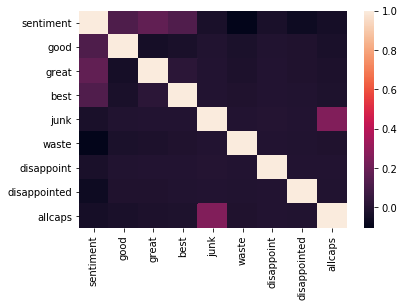

In [106]:
sns.heatmap(raw_report_2.corr())

In [108]:
data = raw_report_2[keywords+['allcaps']]
target = raw_report_2['sentiment']

In [111]:
bnb = BernoulliNB()

bnb.fit(data,target)

y_pred = bnb.predict(data)

print('Number of mislabeled points out of total {} points : {}'.format(
      data.shape[0],
      (target != y_pred).sum() 
))

Number of mislabeled points out of total 1000 points : 429


In [112]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.575
Testing on Sample: 0.571


In [113]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.56, 0.59, 0.59, 0.57, 0.57, 0.58, 0.56, 0.57, 0.59, 0.53])

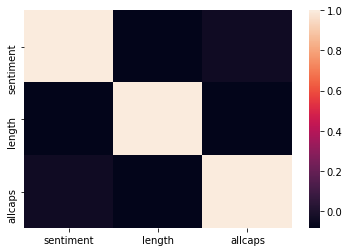

In [128]:
raw_report_5 = raw_report.drop(['good']+['great']+['best']+['junk']+['waste']+['disappointed']+['disappoint'], axis = 1)
sns.heatmap(raw_report_5.corr())

In [129]:
data = raw_report_4[['length']+['allcaps']]
target = raw_report_4['sentiment']

In [130]:
bnb = BernoulliNB()

bnb.fit(data,target)

y_pred = bnb.predict(data)

print('Number of mislabeled points out of total {} points : {}'.format(
      data.shape[0],
      (target != y_pred).sum() 
))

Number of mislabeled points out of total 1000 points : 457


In [131]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.545
Testing on Sample: 0.543


In [132]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.57, 0.52, 0.54, 0.57, 0.59, 0.49, 0.56, 0.52, 0.56, 0.51])

None of the classifiers seem to be overlifting . All of the diffrent validation methods return very similar together. 

The classifier seems to work best when all of the varables are included since we do not have anything that will overfit. 

The key word targeting seems to be the most accurate, followed by the all the caps and length. 